# Chapter 2:

**Expressions**

>* `univariate regression` means you have one target to predict. 
>* `Mutltivariate regression` means you predict multiple targets.
>* `multiple regression` means you have multiple features to be used in the model.

>* Although the `RMSE` is generally the preferred performance measure for regression tasks, sometimes we use `MAE` (In case of outliers).
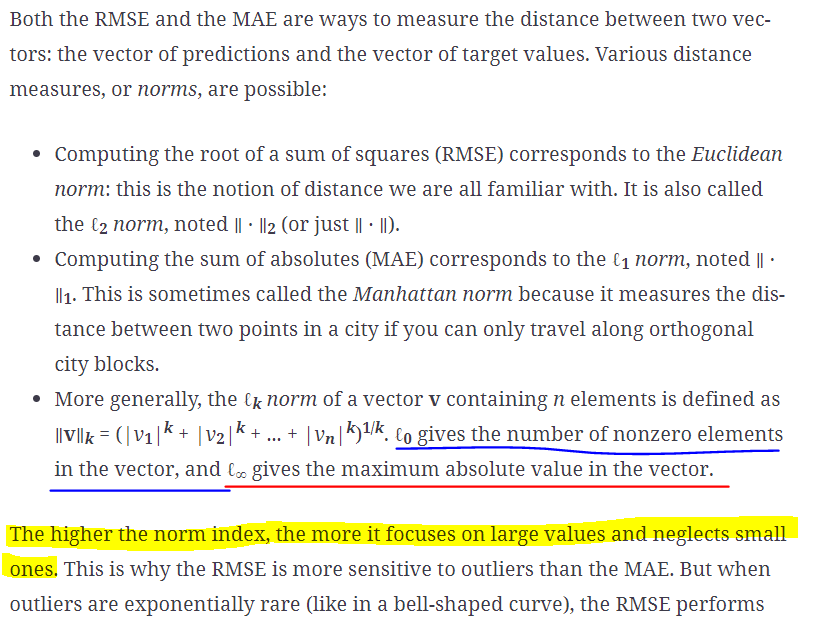 
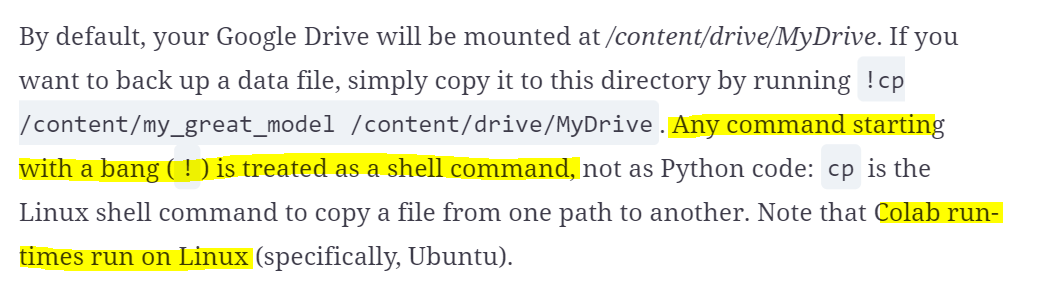
____________________

In [101]:
# This code is to scrap a .tgz file "similar to zip" from the web and extract it in a certain path (named "datasets" in this jupytern environment). 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tarfile
import urllib.request


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv("datasets/housing/housing.csv")
df = load_housing_data()

In [102]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [103]:
df['ocean_proximity'].value_counts(dropna = False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### split the data into numberic and categorical:

In [104]:
numeric_df = df.select_dtypes(exclude = ['object'])
categor_df = df.select_dtypes(exclude = [np.number] )

numeric_df.describe() # "NaN" values is not taken into consideration

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


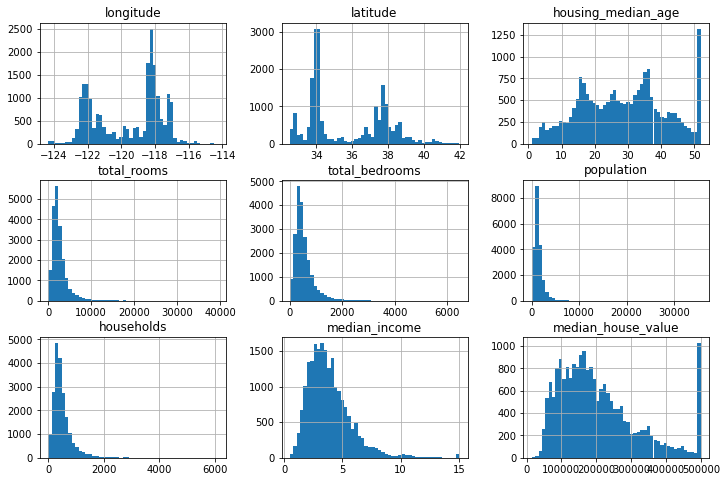

In [105]:
numeric_df.hist(bins= 50 ,figsize=(12,8));

#### Insights from the above plot:
>* **Looking on the feature values,** `median_income` doesn't look reasonable (peoplle income cannot be only 5 or 15 dollar)... after asking the team who collected data, we found 5 dollars means 50 000 dollar.
>* **Looking at the skewness,** most of the data have high skewness that we should handle.
>* **Looking at the odd occurences,** `median_house_value` & `housing_mdedian_age`shows odd at (value 50) ... this has two interpretations:
>>* May be those feature values doesn't exceed 50.
>>* May be the team has set any value beyond 50 to be 50.<font color = 'red'> *In such cases, you may drop this value (in order not to mislead the model) or choose the proper value for those features beyound 50.*<font>
____________________

❓❓ **Data snooping bias** ❓
>It may seem strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which also means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of machine learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. This is called *data snooping* bias.

________________

#### Important Notes about `train_test_split`:
>* `x` fed into the `train_test_split` should be 2D ... but `y` can be 1D or 2D (and this affects the resulted `y_train`, `y_test`)
>* stratify can be **`stratify = True`** or **`stratify = y`**
>|A|B|
>|-|-|
>|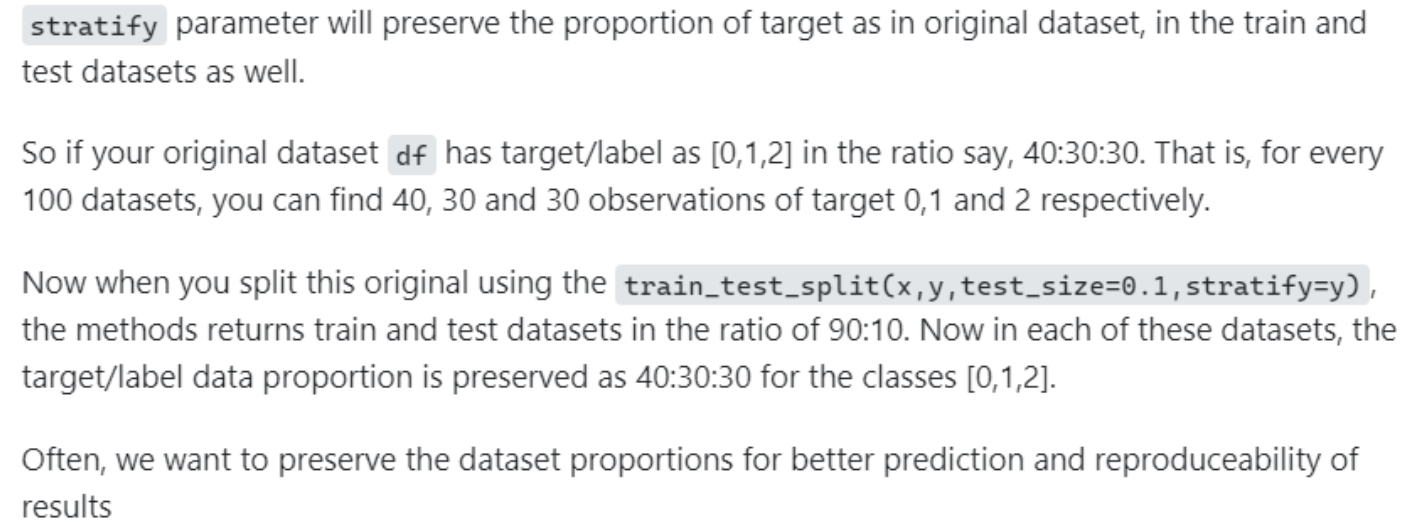 |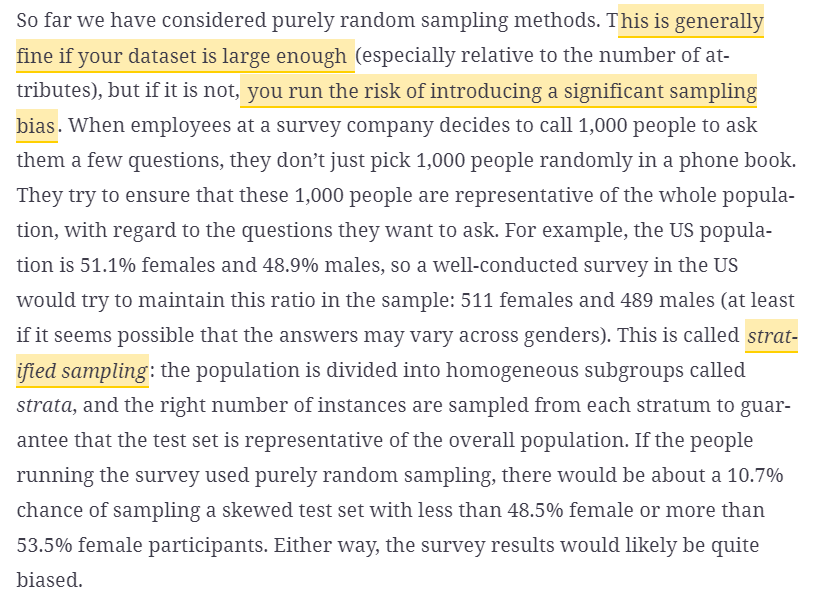


#### Important note for splitting:
>* You should pay attention when you update your data not to affect the previous data ... like that (if the original data have certain instances in the 80% train and another certain instances in 20% test), if you add more data and schffuled, you should assert that none of the test-instances became in the train or vice versa...
> you can do this by assiging an unique idintifier for each instance.


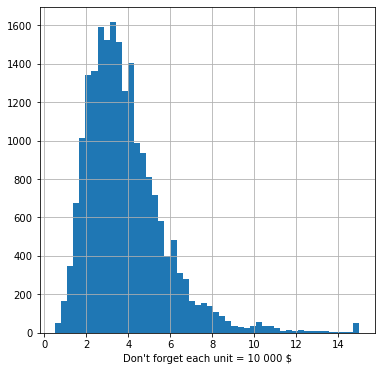

In [106]:
df['median_income'].hist(figsize=(6,6),bins = 50)
plt.xlabel("Don't forget each unit = 10 000 $");

#### If we want to apply stratify in current case:
>* we cannot set `stratify = True` or `stratify = y` because our label is continous and stratify divide on the categorical columns.
>* Therefore we may use `cut` or `qcut` to make a categorical copy of our current continous label... then set `stratify = df['income_cat']`
>* but <font color = 'red'>**TAKE CARE**</font> you may fall in the trap of **imbalanced data** if some divided categories are two small.


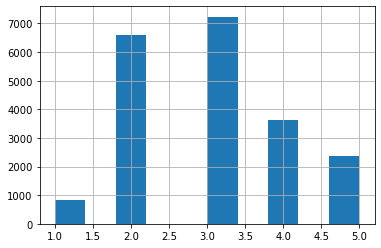

In [107]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df['income_cat'].hist();

In [109]:
from sklearn.model_selection import train_test_split

x = df[[col for col in df.columns if col != 'median_income']]
y = df['median_income']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, stratify = df['income_cat'], test_size = 0.2)

x_test.shape , x_train.shape

((4128, 10), (16512, 10))

In [124]:
# same percentage appears in both to indicate that `stratify` works well

x_test['income_cat'].value_counts(dropna = False) / len(x_test)
x_train['income_cat'].value_counts(dropna = False) / len(x_train)

(3    0.350533
 2    0.318798
 4    0.176357
 5    0.114583
 1    0.039729
 Name: income_cat, dtype: float64,
 3    0.350594
 2    0.318859
 4    0.176296
 5    0.114402
 1    0.039850
 Name: income_cat, dtype: float64)

4128